Train Model A: Fully Connected Layers

Below are the steps to perform image classification on the MNIST dataset using only fully connected layers in Google Colab:

We need to install the required libraries, such as TensorFlow and Keras, by running the following code in a code cell:


In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
!pip install keras-applications

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2

1. Load the MNIST dataset using Keras:

In [ ]:
from keras.datasets import mnist
(X_train_FC, y_train_FC), (X_test_FC, y_test_FC) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


2. Preprocess the data by reshaping the image arrays and normalizing the pixel values:

In [ ]:
X_train_FC = X_train_FC.reshape(-1, 784) / 255.0
X_test_FC = X_test_FC.reshape(-1, 784) / 255.0


3. One-hot encode the target labels:

In [ ]:
from keras.utils import to_categorical
y_train_FC = to_categorical(y_train_FC, 10)
y_test_FC = to_categorical(y_test_FC, 10)

print("Training data shape: ", X_train_FC.shape)
print("Training labels shape: ", y_train_FC.shape)
print("Test data shape: ", X_test_FC.shape)
print("Test labels shape: ", y_test_FC.shape)

Training data shape:  (60000, 784)
Training labels shape:  (60000, 10)
Test data shape:  (10000, 784)
Test labels shape:  (10000, 10)


4. Define the model architecture using a sequential model and dense layers:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model_FC = Sequential()
model_FC.add(Dense(512, activation='relu', input_shape=(784,)))
model_FC.add(Dense(256, activation='relu'))
model_FC.add(Dense(10, activation='softmax'))
model_FC.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


5. Compile the model with a suitable loss function, optimizer, and metrics:

In [ ]:
model_FC.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])


6. Train the model using the fit method:

In [ ]:
history = model_FC.fit(X_train_FC, y_train_FC, batch_size=128, epochs=10,
                       validation_data=(X_test_FC, y_test_FC))


Epoch 1/10
469/469 [==============================] - 22s 43ms/step - loss: 0.2279 - accuracy: 0.9327 - val_loss: 0.1106 - val_accuracy: 0.9667
Epoch 2/10
469/469 [==============================] - 14s 31ms/step - loss: 0.0815 - accuracy: 0.9755 - val_loss: 0.0775 - val_accuracy: 0.9754
Epoch 3/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0519 - accuracy: 0.9844 - val_loss: 0.0728 - val_accuracy: 0.9759
Epoch 4/10
469/469 [==============================] - 13s 27ms/step - loss: 0.0355 - accuracy: 0.9892 - val_loss: 0.0766 - val_accuracy: 0.9764
Epoch 5/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0726 - val_accuracy: 0.9792
Epoch 6/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0222 - accuracy: 0.9926 - val_loss: 0.0721 - val_accuracy: 0.9800
Epoch 7/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0182 - accuracy: 0.9940 - val_loss: 0.0794 - val_accuracy:

7. Evaluate the model on the test data and show the results:

In [ ]:
train_loss_FC, train_accuracy_FC = model_FC.evaluate(X_train_FC, y_train_FC)
test_loss_FC, test_accuracy_FC = model_FC.evaluate(X_test_FC, y_test_FC)
print('Train Loss:', train_loss_FC)
print('Train Accuracy:', train_accuracy_FC)
print('Test Loss:', test_loss_FC)
print('Test Accuracy:', test_accuracy_FC)

313/313 [==============================] - 1s 5ms/step - loss: 0.0718 - accuracy: 0.9844
Train Loss: 0.005000327248126268
Train Accuracy: 0.998533308506012
Test Loss: 0.07183941453695297
Test Accuracy: 0.9843999743461609


In [ ]:
history.history['val_accuracy']

[0.96670001745224,
 0.9753999710083008,
 0.9758999943733215,
 0.9764000177383423,
 0.979200005531311,
 0.9800000190734863,
 0.978600025177002,
 0.9814000129699707,
 0.9801999926567078,
 0.9843999743461609]

Graph Plotting to show performance of FC models 

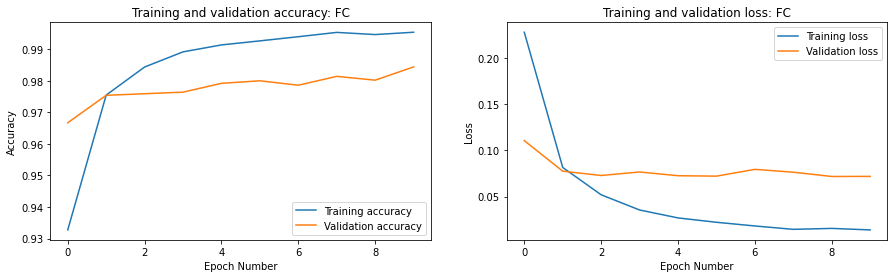

In [ ]:
fig = plt.figure(figsize=(15,4))

fig.add_subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Training and validation accuracy: FC')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')

fig.add_subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Training and validation loss: FC')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()

Confusion Matrix for FC

In [ ]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# Get predictions
y_predict_FC = model_FC.predict(X_test_FC)
y_predict_FC = np.argmax(y_predict_FC, axis=1)

# Extract true class labels from one-hot encoded array
y_true_FC = np.argmax(y_test_FC, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_FC, y_predict_FC)

313/313 [==============================] - 6s 19ms/step


In [ ]:
# Calculate accuracy
accuracy = np.trace(cm) / float(np.sum(cm))

# Calculate precision
precision = precision_score(y_true_FC, y_predict_FC, average='macro')

# Calculate recall
recall = recall_score(y_true_FC, y_predict_FC, average='macro')

Print Performance Parameters

In [ ]:
print("Accuracy: {:.4f}%".format(accuracy * 100))
print("Precision: {:.4f}%".format(precision * 100))
print("Recall: {:.4f}%".format(recall * 100))

Accuracy: 98.4400%
Precision: 98.4296%
Recall: 98.4354%


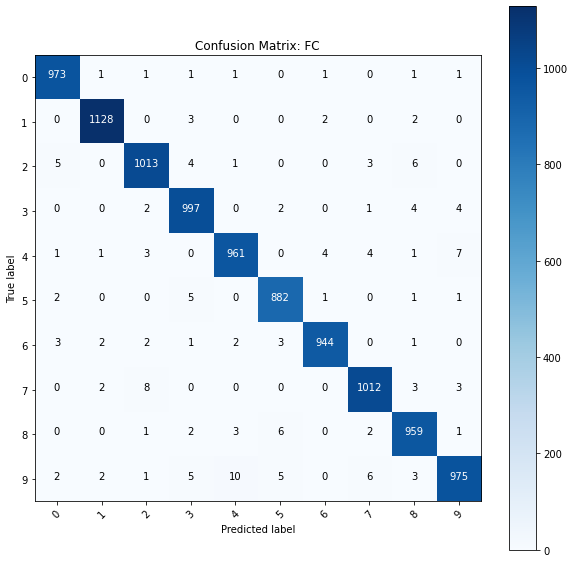

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, [str(i) for i in range(10)], rotation=45)
plt.yticks(tick_marks, [str(i) for i in range(10)])
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix: FC')
plt.show()